>

# Project: Investigate a Dataset - [No_show appointments ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **** This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row \n

**columns:

*‘ScheduledDay’: tells us on what day the patient set up their appointment.

*‘Neighborhood’:indicates the location of the hospital.

*‘Scholarship’ :indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

****Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis
**What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
# Upgrade pandas to use dataframe.explode() function. 

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> 

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('no_show.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [3]:
#the Raws and columns of the data
df.shape

(110527, 14)

In [4]:
#check the duplicated raws of the data
df.duplicated().sum() 

0

No duplicted raws

In [5]:
#check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing values 

In [6]:
#describe our data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


*The average of ages is 37 years

*The min of age is mistake becauese it is -1 

*The max of age is 115 years


### Data Cleaning

 

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# we do not need the information like : PatientId ,AppointmentID,ScheduledDay,AppointmentDay
df.drop(columns=['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
#Rename a column to fcilitate the analysis 
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head(3)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [9]:
# The minimum of age does not make sense 
#Find this patient 
df[df['Age']<0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
#drop this patient 
df.drop(99832 , inplace= True)
df[df['Age']<0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


Now our data is cleaned 

<a id='eda'></a>
## Exploratory Data Analysis


### Analysing all the characteristics of our data 

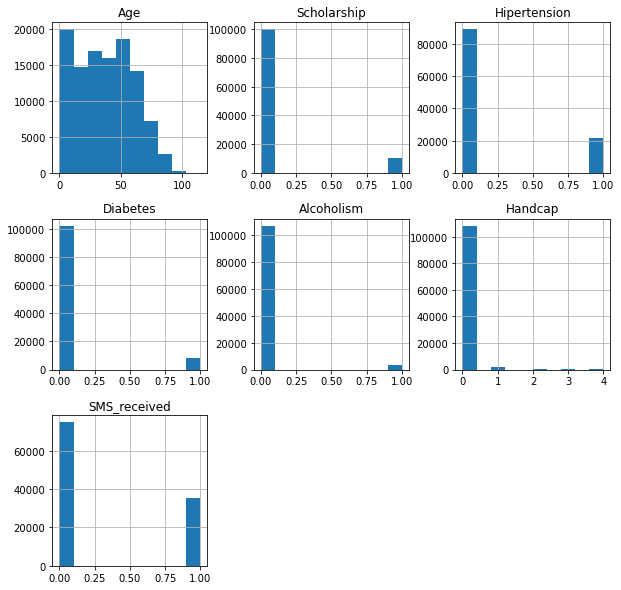

In [11]:
#Analysing our data by the hist plot
df.hist(figsize=(10,10));

-Most of the patients are recieved the SMS about double those who did not receive

-the patient is enrolled in 'Brasilian welfare program Bolsa Família' about 10 % 

-Most of the patients does not suffer from (Alcoholism ,Diabetes,Handcap)

-About 20000 of the patient suffers from the Hipertension

In [12]:
#Numbers of the patient who showed 
df_show=df[df['No_show']=='No']
df_show.count()

Gender           88207
Age              88207
Neighbourhood    88207
Scholarship      88207
Hipertension     88207
Diabetes         88207
Alcoholism       88207
Handcap          88207
SMS_received     88207
No_show          88207
dtype: int64

In [13]:
#Numbers of the patient who did not show 
df_noshow=df[df['No_show']=='Yes']
df_noshow.count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hipertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

The number of the patients who did not show is about 25 % 

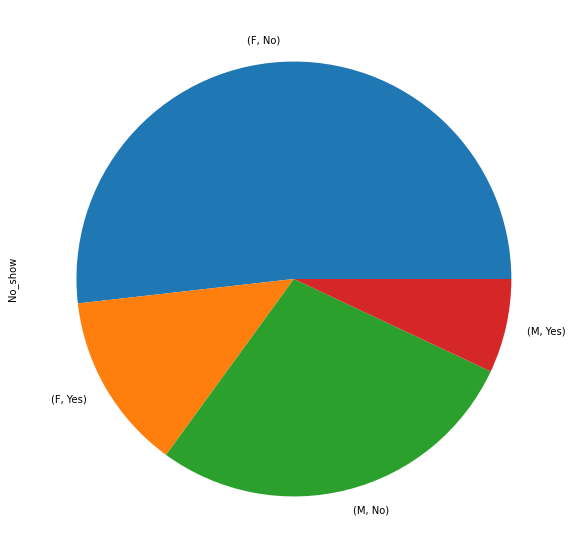

In [14]:
# Comparsion according to the gender
df.groupby(['Gender','No_show']).No_show.count().plot(kind='pie',figsize=(10,10))
df.groupby(['Gender','No_show']).No_show.count ;

In [39]:
# Comparsion according to the gender by another way to get the exactly numbers 
df.groupby('Gender')['No_show'].value_counts()

Gender  No_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

The percentage of Females who did not attend is close to that of Males 
so the Gender is insignificant

In [32]:
#Making a function to help us in the analysis
def plot (xVar): 
    """
    "This function Make graphics easier"
    the input is the name of the column 
    the function will return the hist plot
    """
    df_show[xVar].hist(label='Show',color='blue')
    df_noshow[xVar].hist(label='No show',color='red')
    plt.xlabel(xVar,color='red')
    plt.ylabel('The number of people',color='red')
    plt.title('Comparsion according to the {}'.format(xVar),color='red')
    plt.legend;

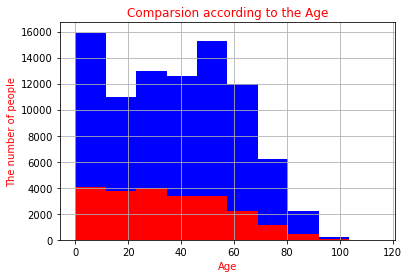

In [33]:
# Comparsion according to the Age
plot('Age')

-Most of patients who show are in the age  0 to 10 and about from 35 to 70

In [16]:
# More details about the patient who show according to the age 
df_show.Age.value_counts()

0      2900
1      1858
52     1449
56     1372
2      1366
       ... 
98        5
100       4
102       2
115       2
99        1
Name: Age, Length: 103, dtype: int64

In [19]:
# More details about the patient who no_show according to the age 
df_noshow.Age.value_counts()

0      639
1      415
17     396
19     394
30     369
      ... 
95       6
115      3
97       2
98       1
96       1
Name: Age, Length: 100, dtype: int64

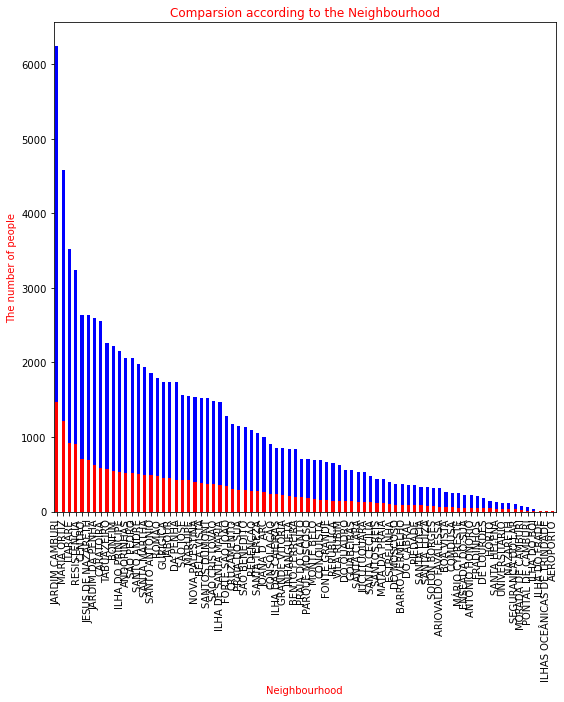

In [21]:
# Comparsion according to the Neighbourhood
df_show.Neighbourhood.value_counts().plot(kind='bar',label='Show',color='blue',figsize=(9,9))
df_noshow.Neighbourhood.value_counts().plot(kind='bar',label='No show',color='red',figsize=(9,9))
plt.xlabel('Neighbourhood',color='red')
plt.ylabel('The number of people',color='red')
plt.title('Comparsion according to the Neighbourhood',color='red')
plt.legend;

In [22]:
#find which Neighbourhood has the most show
df_show.Neighbourhood.value_counts()

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

The Neighbourhood is a strong significant 

-' JARDIM CAMBURI' has the maximum number of the show

-' PARQUE INDUSTRIAL'has the minimum number of the show


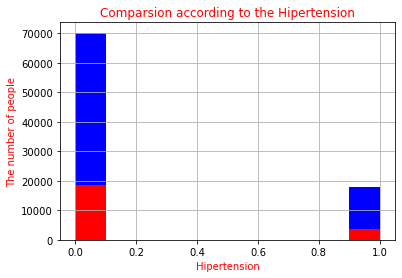

In [34]:
# Comparsion according to the Hipertension
plot('Hipertension')

Hipertension is insignificant

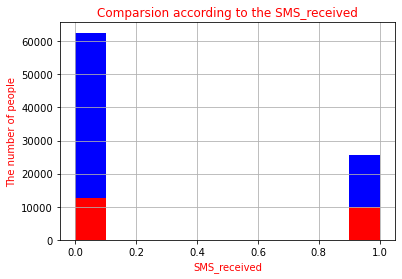

In [36]:
# Comparsion according to the SMS_received
plot('SMS_received')

The Most of patients who showed did not recieve SMS , it is strange 

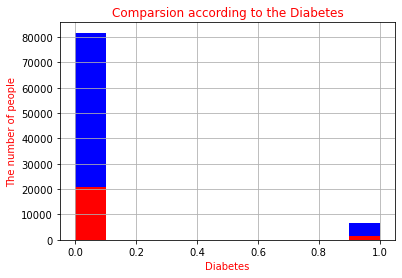

In [37]:
# Comparsion according to the Diabetes
plot('Diabetes')

Diabetes is insignificant

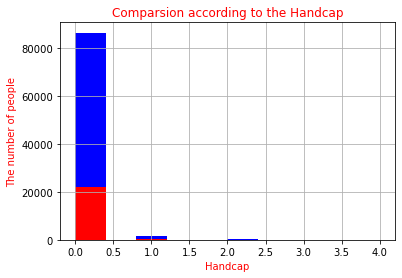

In [38]:
# Comparsion according to the Handcap
plot('Handcap')

Handcap is insignificant

<a id='conclusions'></a>
## Conclusions

> *At the end i could say that the Age is an important sign , the most of the show is between 0 to 10 & 35 to 70 

> *The Neighbourhood is a strong significant 

           - JARDIM CAMBURI: has the maximum number of the show

           - PARQUE INDUSTRIAL: has the minimum number of the show

> *I could not take the SMS as a sign because it is strange as The Most of patients who showed did not recieve SMS

> *Other characteristics is insignificant

     ##limitations :1) I think that we may need weather conditions, as they may have an effect on patients not attending if they are bad

                     2)We must know the social conditions of patients, as they certainly have an impact on their neglect of their health
     
  #Notes: This analysis is only my opinion

## Submitting your Project 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])